# TMDB Box Office Prediction EDA + ML

![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)
[image-source](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

## Prerequisities

### Loading Libraries

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

import warnings
warnings.filterwarnings("ignore")

['train.csv', 'sample_submission.csv', 'test.csv']


### Loading the data

In [51]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub_df = pd.read_csv('../input/sample_submission.csv')

### Inspecting the train set

In [52]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [53]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [54]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Exploratory Data Analysis

In [55]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Univariate Analysis

#### Revenue

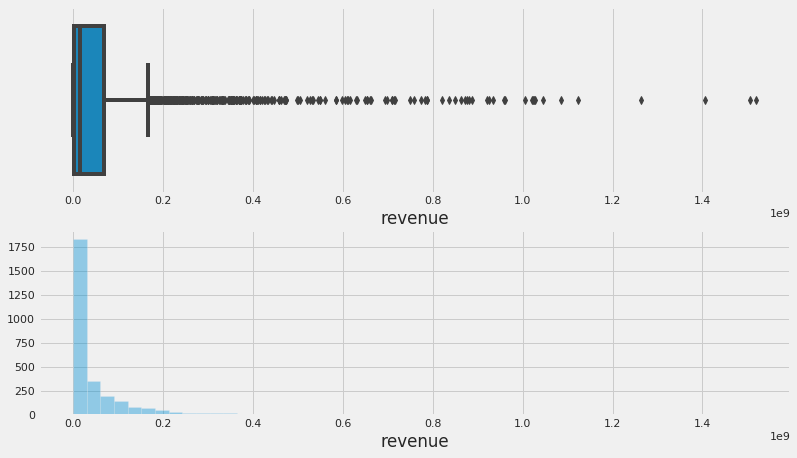

In [56]:
f, ax = plt.subplots(2, figsize=(12,7))
sns.boxplot(x=train_df.revenue, ax = ax[0])
sns.distplot(a=train_df.revenue, kde = False, ax = ax[1])

#### Budget

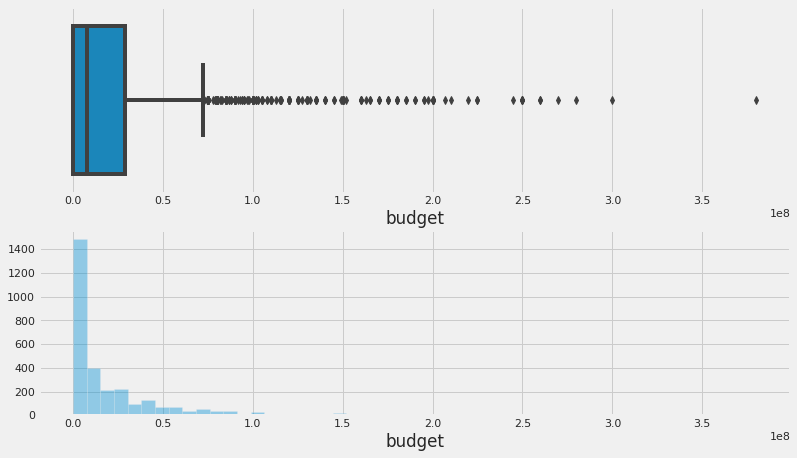

In [57]:
f, ax = plt.subplots(2, figsize=(12,7))
sns.boxplot(x=train_df.budget, ax = ax[0])
sns.distplot(a=train_df.budget, kde = False, ax = ax[1])

#### Genres

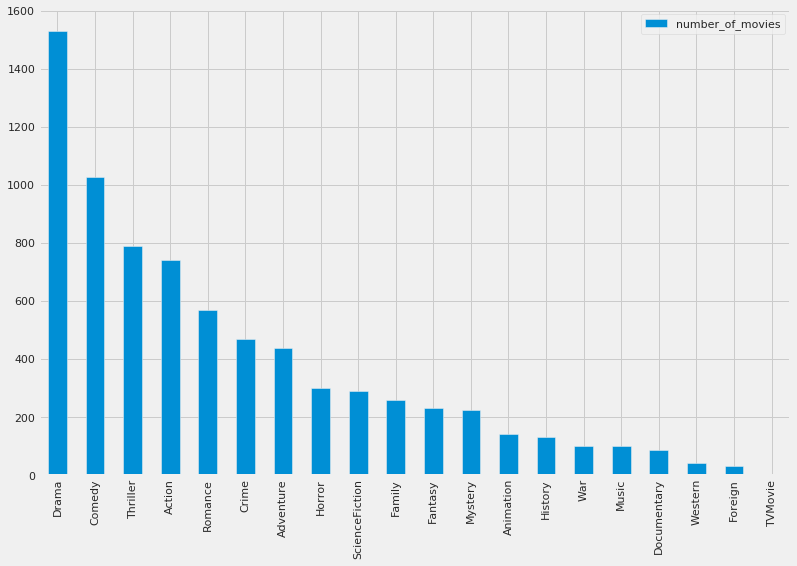

In [58]:

def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1



genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()

#### Original Language

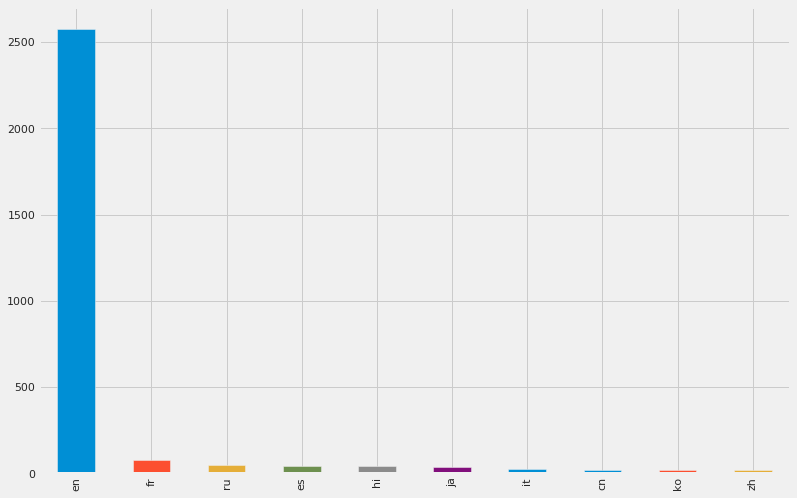

In [59]:
train_df.original_language.value_counts()[:10].plot.bar()

#### Production Companies

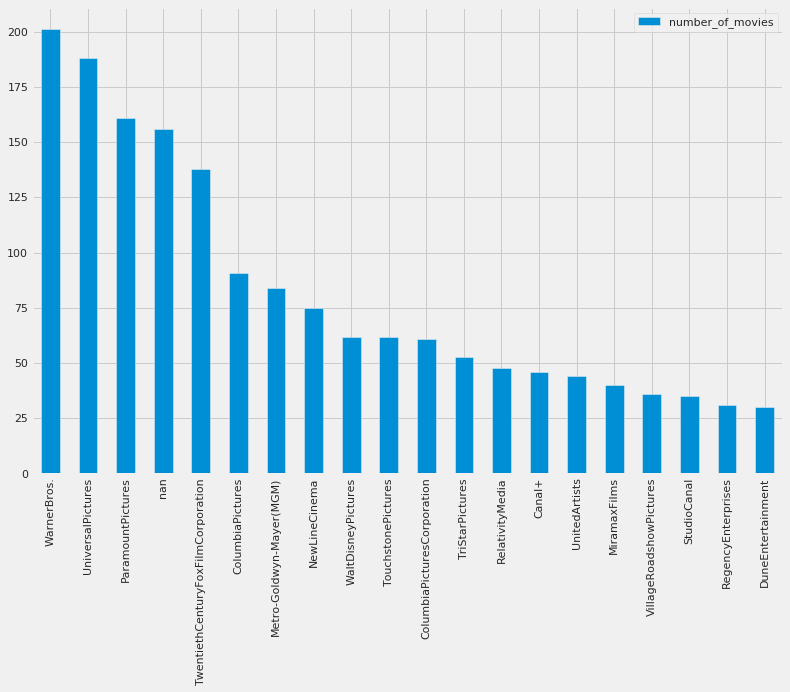

In [60]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1



production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(20).plot.bar()

#### production_countries

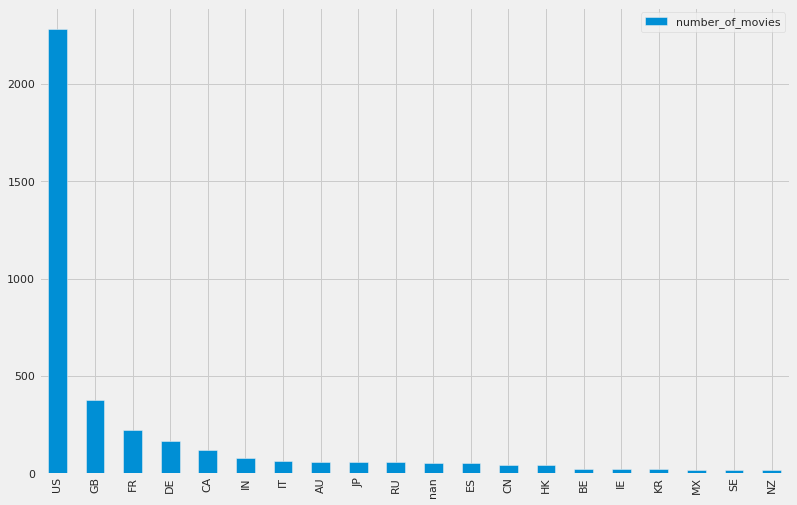

In [61]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_countries_processed"] = train_df.production_countries.apply(lambda elem: production_countries_preprocessing(elem))


production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(20).plot.bar()

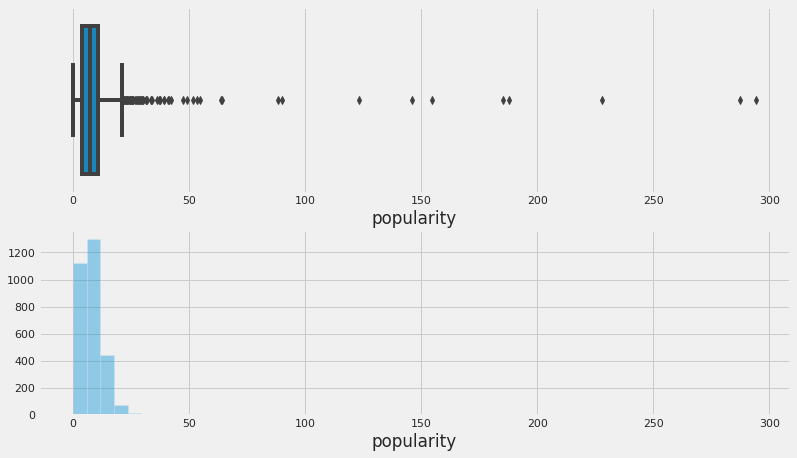

In [62]:
f, ax = plt.subplots(2, figsize=(12,7))
sns.boxplot(x=train_df.popularity, ax = ax[0])
sns.distplot(a=train_df.popularity, kde = False, ax = ax[1])

### Bivariate Analysis

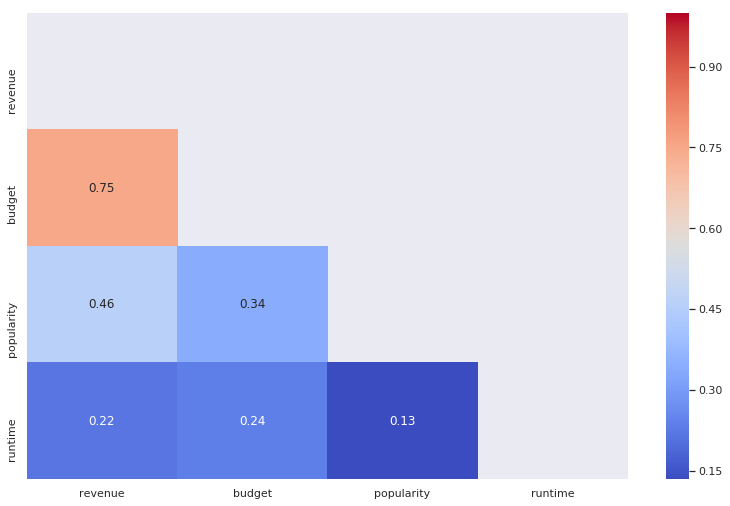

In [63]:
sns.set(rc={'figure.figsize':(12,8)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

## Machine Learning

### Feature Engineering

In [64]:
train_df['belongs_to_collection_flag'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
train_df['belongs_to_collection_flag'].value_counts()

0    2396
1     604
Name: belongs_to_collection_flag, dtype: int64

In [65]:
train_df['homepage_flag'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
train_df['homepage_flag'].value_counts()

0    2054
1     946
Name: homepage_flag, dtype: int64

#### Preparations before ML modeling

In [66]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'genres_processed', 'production_companies_processed',
       'production_countries_processed', 'belongs_to_collection_flag',
       'homepage_flag'],
      dtype='object')

In [67]:
y = train_df['revenue']
X = train_df[["budget", "popularity", "runtime"]]

#### A function to calculate Root Mean Squared Logarithmic Error (RMSLE)

In [68]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

### Baseline XGBoost

In [69]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from collections import Counter
from sklearn.metrics import mean_absolute_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 10
mae = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_xgb = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions_valid = clf_stra_xgb.predict(xvalid)
    mae_valid = mean_absolute_error(yvalid, predictions_valid)
    mae += mae_valid
    #predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    #predictions_probas_list += predictions_probas/num_of_folds

    predictions_test += clf_stra_xgb.predict(test_df[xtrain.columns])/10


#predictions = np.argmax(predictions_probas, axis=1)



print(predictions_test)
print(mae/num_of_splits)


Fold: 0

[0]	validation_0-rmse:1.55609e+08	validation_1-rmse:1.42086e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.65266e+07	validation_1-rmse:7.65812e+07
[200]	validation_0-rmse:7.06217e+07	validation_1-rmse:7.34753e+07
[300]	validation_0-rmse:6.70367e+07	validation_1-rmse:7.46416e+07
[400]	validation_0-rmse:6.44475e+07	validation_1-rmse:7.46029e+07
[500]	validation_0-rmse:6.28125e+07	validation_1-rmse:7.57671e+07
[600]	validation_0-rmse:6.08811e+07	validation_1-rmse:7.45383e+07
[700]	validation_0-rmse:5.89986e+07	validation_1-rmse:7.71492e+07
[800]	validation_0-rmse:5.77852e+07	validation_1-rmse:7.61834e+07
[900]	validation_0-rmse:5.66637e+07	validation_1-rmse:7.71889e+07
[1000]	validation_0-rmse:5.55741e+07	validation_1-rmse:7.8539e+07
[1100]	validation_0-rmse:5.46205e+07	validation_1-rmse:7.90321e+07
Stopping. Best iteration:
[169]	valida

[600]	validation_0-rmse:6.16098e+07	validation_1-rmse:8.04559e+07
[700]	validation_0-rmse:5.97531e+07	validation_1-rmse:8.17757e+07
[800]	validation_0-rmse:5.85159e+07	validation_1-rmse:8.09698e+07
[900]	validation_0-rmse:5.73951e+07	validation_1-rmse:8.11296e+07
[1000]	validation_0-rmse:5.63719e+07	validation_1-rmse:8.2686e+07
Stopping. Best iteration:
[86]	validation_0-rmse:7.70563e+07	validation_1-rmse:7.60729e+07


Fold: 8

[0]	validation_0-rmse:1.50655e+08	validation_1-rmse:1.83507e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.17917e+07	validation_1-rmse:1.2022e+08
[200]	validation_0-rmse:6.66142e+07	validation_1-rmse:1.22652e+08
[300]	validation_0-rmse:6.34275e+07	validation_1-rmse:1.2296e+08
[400]	validation_0-rmse:6.0898e+07	validation_1-rmse:1.25077e+08
[500]	validation_0-rmse:5.91134e+07	validation_1-rmse:1.25696e+08
[600]	validation

### Bayesian Tuning

In [70]:
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    import xgboost as xgb
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBRegressor(
            nthread = -1,
            objective = 'reg:linear',
            verbosity=1
        ),
        search_spaces = {
            'learning_rate': (0.01, 1.0, 'log-uniform'),
            'min_child_weight': (0, 10),
            'n_estimators': (50, 100),
            'max_depth': (0, 12),
            'gamma': (1e-2, 10, 'log-uniform'),
            'subsample': (0.01, 1.0, 'uniform'),
            'colsample_bytree': (0.01, 1.0, 'uniform'),
            'colsample_bylevel': (0.01, 1.0, 'uniform'),
            'scale_pos_weight': (0.01, 1.0, 'uniform'),
            'reg_lambda': (1e-1, 10, 'log-uniform'),
            'reg_alpha': (1e-2, 1.0, 'log-uniform'),
            'max_delta_step': (0, 10, 'uniform'),
            'scale_pos_weight': (1e-2, 1, 'uniform')
        },
        cv = KFold(
            n_splits=10,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 1,
        n_iter = 7,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))

        ### Save all model results
        #clf_name = bayes_cv_tuner.estimator.__class__.__name__
        #all_models.to_csv(clf_name+"_cv_results.csv")
        ###
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -0.2352
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 6.2893244081003825, 'learning_rate': 0.042815319280763466, 'max_delta_step': 6.701479482689346, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.04063746627400019, 'reg_lambda': 1.97507311198574, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: -0.2352
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.08132617181090022, 'learning_rate': 0.7988179462781242, 'max_delta_step': 8.641279154649506, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.18683498597281528, 'reg_lambda': 8.071612428512733, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: -0.2352
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.08132617

In [71]:
result.best_params_

{'colsample_bylevel': 0.8390144719977516,
 'colsample_bytree': 0.8844821246070537,
 'gamma': 0.08132617181090022,
 'learning_rate': 0.7988179462781242,
 'max_delta_step': 8.641279154649506,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 68,
 'reg_alpha': 0.18683498597281528,
 'reg_lambda': 8.071612428512733,
 'scale_pos_weight': 0.6336020558163782,
 'subsample': 0.9923710598637134}

### Training after tuning

In [72]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import scikitplot as skplt
import time
import random

import xgboost as xgb


print("baseline")

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_tuned = np.zeros(len(test_df))
num_fold = 0
mae = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=10, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42)

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_tuned_xgb.predict(xvalid)
    #predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    #predictions_probas_list += predictions_probas/num_of_folds

    predictions_test_tuned += clf_stra_tuned_xgb.predict(test_df[xtrain.columns])/10


#predictions = np.argmax(predictions_probas, axis=1)



print(predictions_test)

baseline

Fold: 0

[0]	validation_0-rmse:1.15301e+08	validation_1-rmse:1.05732e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.8149e+07	validation_1-rmse:7.38815e+07
[200]	validation_0-rmse:7.51119e+07	validation_1-rmse:7.51102e+07
[300]	validation_0-rmse:7.30341e+07	validation_1-rmse:7.62802e+07
[400]	validation_0-rmse:7.13875e+07	validation_1-rmse:7.74373e+07
[500]	validation_0-rmse:7.00304e+07	validation_1-rmse:7.80616e+07
[600]	validation_0-rmse:6.88695e+07	validation_1-rmse:7.75565e+07
[700]	validation_0-rmse:6.77198e+07	validation_1-rmse:7.74933e+07
[800]	validation_0-rmse:6.67748e+07	validation_1-rmse:7.79526e+07
[900]	validation_0-rmse:6.59008e+07	validation_1-rmse:7.80681e+07
[1000]	validation_0-rmse:6.51152e+07	validation_1-rmse:7.78161e+07
Stopping. Best iteration:
[72]	validation_0-rmse:7.93079e+07	validation_1-rmse:7.32048e+07


Fol

[1100]	validation_0-rmse:6.43392e+07	validation_1-rmse:8.31215e+07
[1200]	validation_0-rmse:6.37098e+07	validation_1-rmse:8.31995e+07
Stopping. Best iteration:
[266]	validation_0-rmse:7.34317e+07	validation_1-rmse:8.23637e+07


Fold: 8

[0]	validation_0-rmse:1.11175e+08	validation_1-rmse:1.42246e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.44189e+07	validation_1-rmse:1.15098e+08
[200]	validation_0-rmse:7.16785e+07	validation_1-rmse:1.17206e+08
[300]	validation_0-rmse:6.9827e+07	validation_1-rmse:1.1834e+08
[400]	validation_0-rmse:6.82649e+07	validation_1-rmse:1.20138e+08
[500]	validation_0-rmse:6.69802e+07	validation_1-rmse:1.21587e+08
[600]	validation_0-rmse:6.58697e+07	validation_1-rmse:1.2129e+08
[700]	validation_0-rmse:6.48915e+07	validation_1-rmse:1.21765e+08
[800]	validation_0-rmse:6.40346e+07	validation_1-rmse:1.21833e+08
[900]	validat

### Scaling the features

In [73]:
from sklearn.preprocessing import StandardScaler

temp_train_df = train_df[["budget", "popularity", "runtime"]]
temp_test_df = test_df[["budget", "popularity", "runtime"]]

scaler = StandardScaler()
temp_train_df = scaler.fit_transform(temp_train_df)
temp_test_df = scaler.transform(temp_test_df)

temp_train_df = pd.DataFrame(temp_train_df, columns=["budget", "popularity", "runtime"])
temp_test_df = pd.DataFrame(temp_test_df, columns=["budget", "popularity", "runtime"])

X = temp_train_df
y = train_df.revenue



In [74]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from collections import Counter
from sklearn.metrics import mean_absolute_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_scaled_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 10
mae = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_scaled_xgb = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

    clf_stra_scaled_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions_valid = clf_stra_scaled_xgb.predict(xvalid)
    mae_valid = mean_absolute_error(yvalid, predictions_valid)
    mae += mae_valid
    #predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    #predictions_probas_list += predictions_probas/num_of_folds

    predictions_scaled_test += clf_stra_scaled_xgb.predict(temp_test_df[xtrain.columns])/10


#predictions = np.argmax(predictions_probas, axis=1)



print(predictions_scaled_test)
print(mae/num_of_splits)


Fold: 0

[0]	validation_0-rmse:1.55609e+08	validation_1-rmse:1.42086e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.65279e+07	validation_1-rmse:7.65815e+07
[200]	validation_0-rmse:7.0593e+07	validation_1-rmse:7.34433e+07
[300]	validation_0-rmse:6.69232e+07	validation_1-rmse:7.45667e+07
[400]	validation_0-rmse:6.43582e+07	validation_1-rmse:7.52517e+07
[500]	validation_0-rmse:6.27283e+07	validation_1-rmse:7.81894e+07
[600]	validation_0-rmse:6.08331e+07	validation_1-rmse:7.76028e+07
[700]	validation_0-rmse:5.92193e+07	validation_1-rmse:7.90416e+07
[800]	validation_0-rmse:5.79243e+07	validation_1-rmse:7.79697e+07
[900]	validation_0-rmse:5.68104e+07	validation_1-rmse:7.84166e+07
[1000]	validation_0-rmse:5.56705e+07	validation_1-rmse:7.93302e+07
[1100]	validation_0-rmse:5.46461e+07	validation_1-rmse:8.00111e+07
Stopping. Best iteration:
[169]	valida

[700]	validation_0-rmse:5.99671e+07	validation_1-rmse:8.2029e+07
[800]	validation_0-rmse:5.86588e+07	validation_1-rmse:8.20042e+07
[900]	validation_0-rmse:5.75818e+07	validation_1-rmse:8.22277e+07
[1000]	validation_0-rmse:5.65144e+07	validation_1-rmse:8.38787e+07
Stopping. Best iteration:
[86]	validation_0-rmse:7.70813e+07	validation_1-rmse:7.62146e+07


Fold: 8

[0]	validation_0-rmse:1.50655e+08	validation_1-rmse:1.83507e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.18065e+07	validation_1-rmse:1.20218e+08
[200]	validation_0-rmse:6.66014e+07	validation_1-rmse:1.22562e+08
[300]	validation_0-rmse:6.35339e+07	validation_1-rmse:1.22745e+08
[400]	validation_0-rmse:6.09939e+07	validation_1-rmse:1.2479e+08
[500]	validation_0-rmse:5.92485e+07	validation_1-rmse:1.25211e+08
[600]	validation_0-rmse:5.72844e+07	validation_1-rmse:1.27455e+08
[700]	validati

In [75]:
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -0.2352
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 6.2893244081003825, 'learning_rate': 0.042815319280763466, 'max_delta_step': 6.701479482689346, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.04063746627400019, 'reg_lambda': 1.97507311198574, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: -0.2352
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.08132617181090022, 'learning_rate': 0.7988179462781242, 'max_delta_step': 8.641279154649506, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.18683498597281528, 'reg_lambda': 8.071612428512733, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: -0.2352
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.08132617

### Retraining after scaling and tuning 

In [77]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from collections import Counter
from sklearn.metrics import mean_absolute_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_scaled_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 10
mae = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_scaled_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42)

    clf_stra_scaled_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions_valid = clf_stra_scaled_tuned_xgb.predict(xvalid)
    mae_valid = mean_absolute_error(yvalid, predictions_valid)
    mae += mae_valid
    #predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    #predictions_probas_list += predictions_probas/num_of_folds

    predictions_scaled_tuned_test += clf_stra_scaled_tuned_xgb.predict(temp_test_df[xtrain.columns])/10


#predictions = np.argmax(predictions_probas, axis=1)


print(predictions_scaled_tuned_test)
print("OOF mae: ",mae/num_of_splits)


Fold: 0

[0]	validation_0-rmse:1.15301e+08	validation_1-rmse:1.05732e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.8149e+07	validation_1-rmse:7.38815e+07
[200]	validation_0-rmse:7.51119e+07	validation_1-rmse:7.51102e+07
[300]	validation_0-rmse:7.30341e+07	validation_1-rmse:7.62802e+07
[400]	validation_0-rmse:7.13875e+07	validation_1-rmse:7.74373e+07
[500]	validation_0-rmse:7.00304e+07	validation_1-rmse:7.80616e+07
[600]	validation_0-rmse:6.88695e+07	validation_1-rmse:7.75565e+07
[700]	validation_0-rmse:6.77198e+07	validation_1-rmse:7.74933e+07
[800]	validation_0-rmse:6.67748e+07	validation_1-rmse:7.79526e+07
[900]	validation_0-rmse:6.59008e+07	validation_1-rmse:7.80681e+07
[1000]	validation_0-rmse:6.51152e+07	validation_1-rmse:7.78161e+07
Stopping. Best iteration:
[72]	validation_0-rmse:7.93079e+07	validation_1-rmse:7.32048e+07


Fold: 1

[0]

[1200]	validation_0-rmse:6.37098e+07	validation_1-rmse:8.31995e+07
Stopping. Best iteration:
[266]	validation_0-rmse:7.34317e+07	validation_1-rmse:8.23637e+07


Fold: 8

[0]	validation_0-rmse:1.11175e+08	validation_1-rmse:1.42246e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:7.44189e+07	validation_1-rmse:1.15098e+08
[200]	validation_0-rmse:7.16785e+07	validation_1-rmse:1.17206e+08
[300]	validation_0-rmse:6.9827e+07	validation_1-rmse:1.1834e+08
[400]	validation_0-rmse:6.82649e+07	validation_1-rmse:1.20138e+08
[500]	validation_0-rmse:6.69802e+07	validation_1-rmse:1.21587e+08
[600]	validation_0-rmse:6.58697e+07	validation_1-rmse:1.2129e+08
[700]	validation_0-rmse:6.48915e+07	validation_1-rmse:1.21765e+08
[800]	validation_0-rmse:6.40346e+07	validation_1-rmse:1.21833e+08
[900]	validation_0-rmse:6.33337e+07	validation_1-rmse:1.21941e+08
[1000]	validat

In [78]:
gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test
submission.to_csv('clf_xgb_baseline.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned
submission.to_csv('clf_xgb_tuned.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_scaled_test
submission.to_csv('clf_xgb_baseline.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_scaled_tuned_test
submission.to_csv('clf_xgb_baseline.csv', index=False)